In [ ]:
import os 
import sys
# Get the parent directory
parent_dir = os.path.dirname(os.path.realpath(os.getcwd()))
# Add the parent directory to sys.path
sys.path.append(parent_dir)

from latent_analysis import utils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from latent_analysis import LTransform as LT

In [3]:
data_path = "../datasets/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb"
D, trial_info, units = utils.read_mc_maze(data_path)
tools = utils.Analysis_tools(fs = 1000)

In [4]:
conds = trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
reach_angles = []
for cond in conds:
# Determine reach angle for color
    mask = np.all(trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    active_target = trial_info[mask].target_pos.iloc[0][trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    reach_angles.append(plt.cm.brg(reach_angle / (2*np.pi) + 0.5))

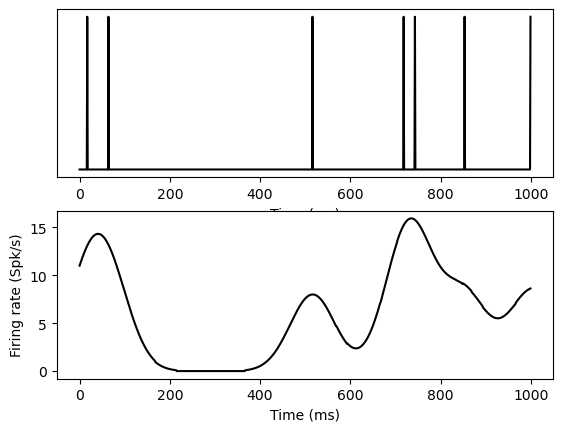

In [5]:
which_unit = 2561
t = [1, 2]

t_pad = 0.5 # Seconds
dt = 1/1000

plt.subplot(2,1,1)
stem = tools.get_stem(units, which_unit, t, plot=True, dt=dt, t_pad=t_pad)
plt.subplot(2,1,2)
fr = tools.get_fr(which_unit, units, t, plot=True, dt=dt, t_pad=t_pad)

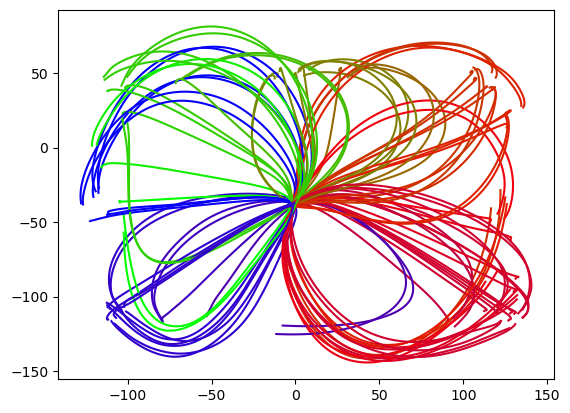

In [17]:
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_pos'
t_range = [-50, 450]

data_aligned, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range)

for i in range(data_aligned.shape[0]):
    plt.plot(data_aligned[i, :, 0], data_aligned[i, :, 1], color=reach_angles[i])


### Preplanning

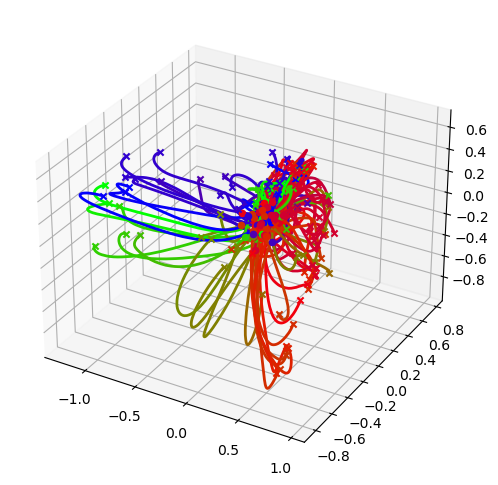

In [21]:
%matplotlib inline  
condition_columns = ['trial_type', 'trial_version']
align_column = 'target_on_time'
#unit = [2561, 1011]
unit = units.index.values
t_range = [-10, 300]
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)

n_mean = np.mean(data_aligned, axis=0, keepdims=True)
n_range = np.max(np.vstack(data_aligned), axis=0, keepdims=True) - np.min(np.vstack(data_aligned), axis=0, keepdims=True)

rate_scaled = (data_aligned - n_mean)/(n_range+5)
transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled, method='FA')
X_ld = transform.transform(rate_scaled, ensure_orthogonality=True)


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for c in range(108):
    ax.plot(X_ld[c, :, 0], X_ld[c,:, 1], X_ld[c,:, 2], lw=2, c=reach_angles[c])
    ax.scatter(X_ld[c,0, 0], X_ld[c,0, 1], X_ld[c,0, 2], color=reach_angles[c])
    ax.scatter(X_ld[c,-1, 0], X_ld[c,-1, 1], X_ld[c,-1, 2], marker = 'x' ,color=reach_angles[c])

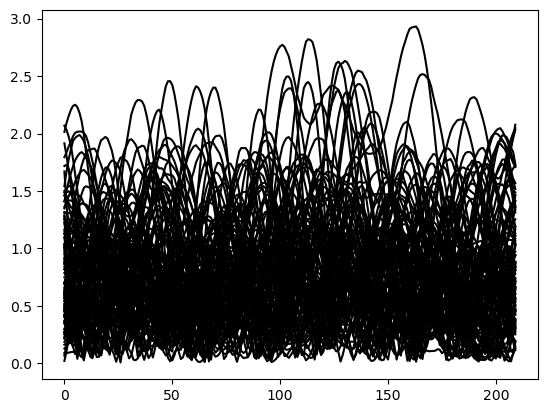

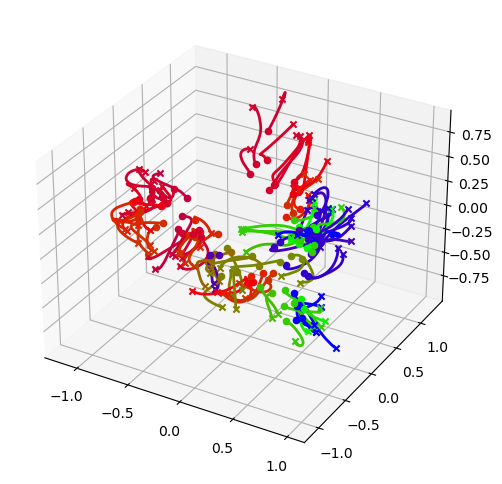

In [23]:
%matplotlib inline

condition_columns = ['trial_type', 'trial_version']
align_column = 'go_cue_time'
channel_column = 'hand_vel'
t_range = [-10, 200]

spd_align, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range)

plt.plot(np.sqrt(np.sum(spd_align**2, axis=2)).T, color='k')
plt.show()

#unit = [2561, 1011]
unit = units.index.values
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)

n_mean = np.mean(data_aligned, axis=0, keepdims=True)
n_range = np.max(np.vstack(data_aligned), axis=0, keepdims=True) - np.min(np.vstack(data_aligned), axis=0, keepdims=True)

rate_scaled = (data_aligned - n_mean)/(n_range+5)
transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled, method='PCA')
X_ld = transform.transform(rate_scaled, ensure_orthogonality=True)


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for c in range(108):
    ax.plot(X_ld[c, :, 0], X_ld[c,:, 1], X_ld[c,:, 2], lw=2, c=reach_angles[c])
    ax.scatter(X_ld[c,0, 0], X_ld[c,0, 1], X_ld[c,0, 2], color=reach_angles[c])
    ax.scatter(X_ld[c,-1, 0], X_ld[c,-1, 1], X_ld[c,-1, 2], marker = 'x' ,color=reach_angles[c])

## Execution 

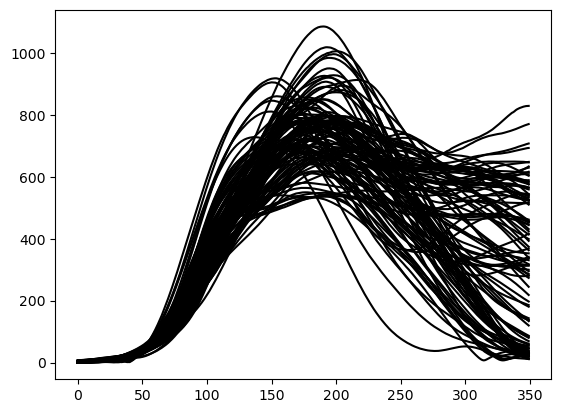

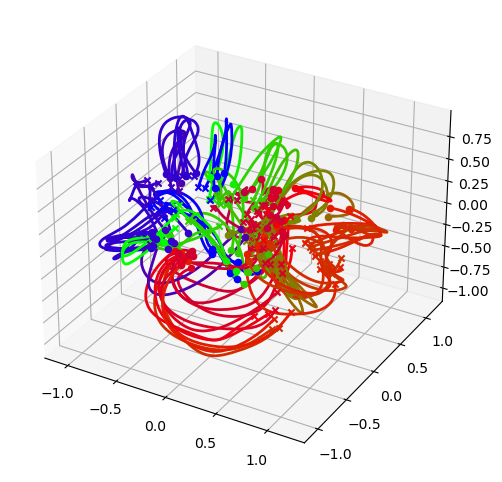

In [24]:
%matplotlib inline
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_vel'
t_range = [-50, 300]

spd_align, cond, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range)

plt.plot(np.sqrt(np.sum(spd_align**2, axis=2)).T, color='k')
plt.show()

#unit = [2561, 1011]
unit = units.index.values
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)

n_mean = np.mean(data_aligned, axis=0, keepdims=True)
n_range = np.max(np.vstack(data_aligned), axis=0, keepdims=True) - np.min(np.vstack(data_aligned), axis=0, keepdims=True)


rate_scaled = (data_aligned - n_mean)/(n_range+5)
transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled, method='PCA')
X_ld = transform.transform(rate_scaled, ensure_orthogonality=True)


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for c in range(108):
    ax.plot(X_ld[c, :, 0], X_ld[c,:, 1], X_ld[c,:, 2], lw=2, c=reach_angles[c])
    ax.scatter(X_ld[c,0, 0], X_ld[c,0, 1], X_ld[c,0, 2], color=reach_angles[c])
    ax.scatter(X_ld[c,-1, 0], X_ld[c,-1, 1], X_ld[c,-1, 2], marker = 'x' ,color=reach_angles[c])

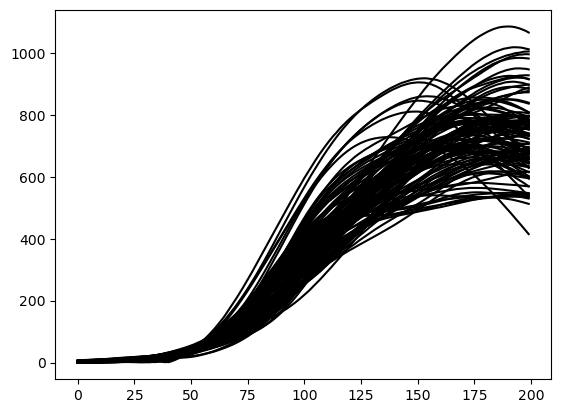

In [25]:
%matplotlib inline
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_vel'
t_range = [-50, 150]

spd_align, cond, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range)

plt.plot(np.sqrt(np.sum(spd_align**2, axis=2)).T, color='k')
plt.show()

unit = units.index.values
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)

Var explained by initial PCA 0.564
R2 for linear fit: 0.377
Var explained by 2 jPCs 0.339


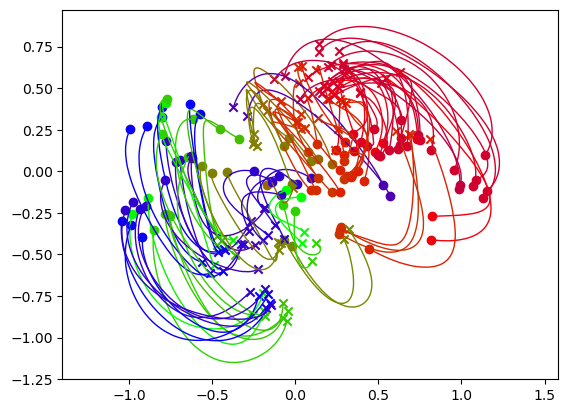

In [26]:
jpca = LT.jPCA(num_jpcs=6, force_skewness=True)
jpca.fit(data_aligned)
rate_jpca = jpca.transform(data_aligned)

for c in range(108):
    plt.plot(rate_jpca[c, :, 0], rate_jpca[c,:, 1], lw=1, c=reach_angles[c])
    plt.scatter(rate_jpca[c, 0, 0], rate_jpca[c,0, 1], color=reach_angles[c])
    plt.scatter(rate_jpca[c, -1, 0], rate_jpca[c,-1, 1], marker = 'x' ,color=reach_angles[c])
plt.axis('equal')
plt.show()

### Condition independent


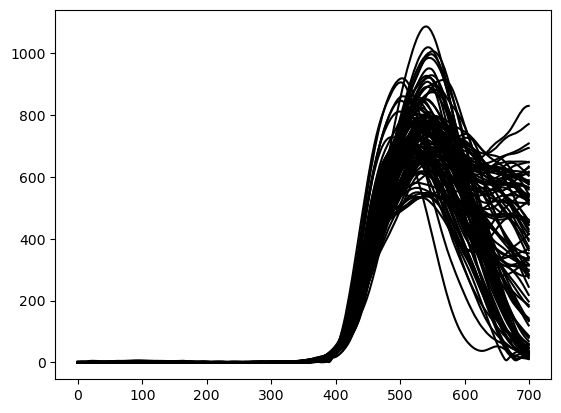

In [27]:
%matplotlib inline
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_vel'
t_range = [-400, 300]

spd_align, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range)

plt.plot(np.sqrt(np.sum(spd_align**2, axis=2)).T, color='k')
plt.show()

unit = units.index.values
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)


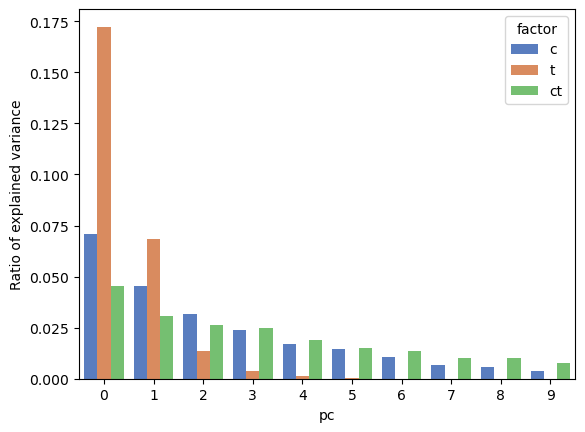

In [28]:
dpca = LT.dPCA(n_components=10)
dpca.fit(data_aligned)
Z = dpca.transform(data_aligned)

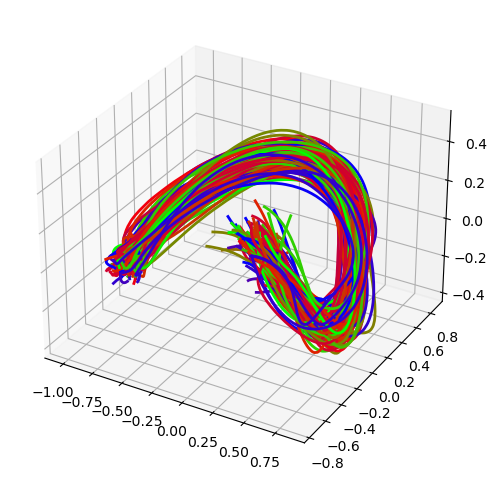

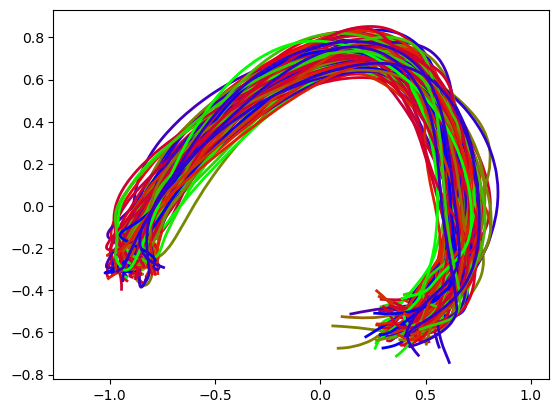

In [29]:
ci_rate = Z['t'].transpose(1,2,0)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for c in range(108):
    ax.plot(ci_rate[c, :, 0], ci_rate[c,:, 1], ci_rate[c,:, 2], lw=2, c=reach_angles[c])
    

plt.show()
for c in range(108):
    plt.plot(ci_rate[c, :, 0], ci_rate[c,:, 1],lw=2, c=reach_angles[c])
plt.axis('equal')
plt.show()


## Orthogonal spaces

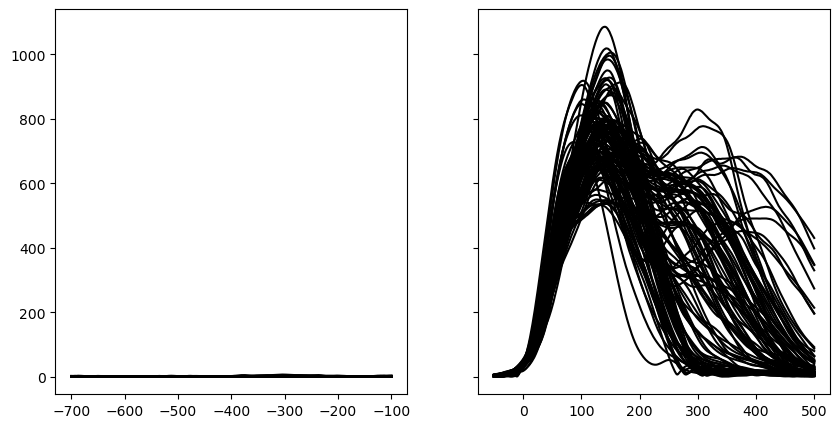

In [31]:
%matplotlib inline
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_vel'
t_range_plan = [-700, -100]
t_range_exe = [-50, 500]

spd_align_plan, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range_plan)
spd_align_exe, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range_exe)

t_p = np.linspace(t_range_plan[0], t_range_plan[1],spd_align_plan.shape[1])
t_e = np.linspace(t_range_exe[0], t_range_exe[1],spd_align_exe.shape[1])

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
axs[0].plot(t_p, np.sqrt(np.sum(spd_align_plan**2, axis=2)).T, color='k')
axs[1].plot(t_e, np.sqrt(np.sum(spd_align_exe**2, axis=2)).T, color='k')
plt.show()

unit = units.index.values
data_prep = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range_plan)
data_exe = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range_exe)



In [32]:
orthPCA = LT.OrthogonalPCA(verbose=3)
W_p, W_e = orthPCA.fit(data_prep, data_exe)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


|   1   | 7281  |   0   | -7.0184e-01 | 1.00e+00 | 1.45e-08 | 3.84e-01 | 1.00e+00 |   0   |
|   2   | 14562 |   1   | -6.0697e-01 | 5.60e+00 | 3.71e-03 | 2.06e-01 | 2.87e+00 |   4   |
|   3   | 21843 |   2   | -6.0697e-01 | 5.60e-01 | 3.71e-03 | 2.06e-01 | 2.87e+00 |   4   |
|   4   | 29124 |   3   | -6.5153e-01 | 3.79e+00 | 2.13e-03 | 1.74e-01 | 2.87e+00 |   4   |
|   5   | 36405 |   4   | -6.5153e-01 | 3.79e-01 | 2.13e-03 | 1.74e-01 | 2.87e+00 |   4   |
|   6   | 43686 |   6   | -6.6047e-01 | 2.64e+00 | 1.98e-03 | 1.25e-01 | 2.87e+00 |   2   |
|   7   | 50967 |   7   | -6.6047e-01 | 2.64e-01 | 1.98e-03 | 1.25e-01 | 2.87e+00 |   4   |
|   8   | 58248 |   8   | -6.6367e-01 | 1.83e+00 | 1.26e-03 | 9.11e-02 | 2.87e+00 |   2   |
|   9   | 65529 |   9   | -6.6367e-01 | 1.83e-01 | 1.26e-03 | 9.11e-02 | 2.87e+00 |   4   |
|  10   | 72810 |  10   | -6.6438e-01 | 1.28e+00 | 8.98e-04 | 6.07e-02 | 2.87e+00 |   2   |
|  11   | 80091 |  11   | -6.6438e-01 | 1.28e-01 | 8.98e-04 | 6.07e-02 | 2.87e+0

In [37]:
# Planning period
condition_columns = ['trial_type', 'trial_version']
align_column = 'target_on_time'
channel_column = 'hand_vel'
t_range_plan  = [-50, 400]

spd_align_plan, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range_plan)

unit = units.index.values
data_aligned_plan = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range_plan)
data_aligned_plan = orthPCA.pre_process(data_aligned_plan)


# Execution period
condition_columns = ['trial_type', 'trial_version']
align_column = 'move_onset_time'
channel_column = 'hand_vel'
t_range_exe = [-400, 300]

spd_align_exe, conds, condi = tools.align_continuous(trial_info, D, condition_columns, align_column, channel_column, t_range_exe)



unit = units.index.values
data_aligned_exe = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range_exe)
data_aligned_exe = orthPCA.pre_process(data_aligned_exe)

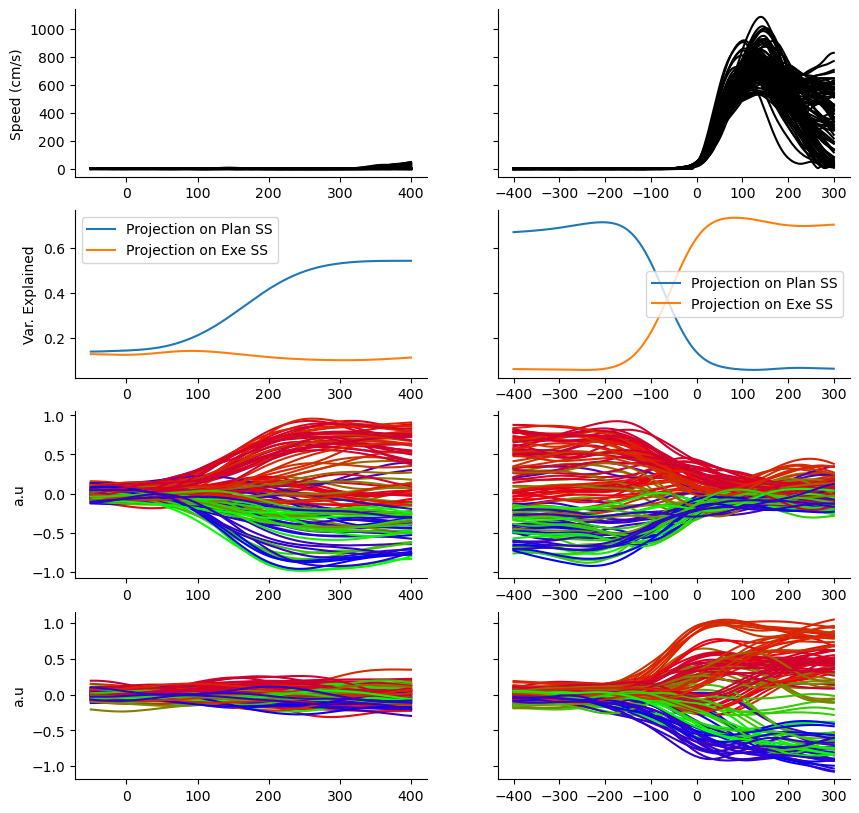

In [38]:
fig, axs = plt.subplots(4, 2, sharey='row', figsize=(10, 10))

t_plan = np.linspace(t_range_plan[0], t_range_plan[1],spd_align_plan.shape[1])

axs[0,0].plot(t_plan, np.sqrt(np.sum(spd_align_plan**2, axis=2)).T, color='k')
axs[0,0].set_ylabel('Speed (cm/s)')



tot_var = np.sum(np.var((data_aligned_plan), axis=0), axis=1)
axs[1,0].plot(t_plan, np.sum(np.var((data_aligned_plan  @ W_p), axis=0), axis=1)/tot_var)
axs[1,0].plot(t_plan, np.sum(np.var((data_aligned_plan  @ W_e), axis=0), axis=1)/tot_var)
axs[1,0].legend(['Projection on Plan SS', 'Projection on Exe SS'])
axs[1,0].set_ylabel('Var. Explained')


for c in range(data_aligned_plan.shape[0]):
    axs[2,0].plot(t_plan, data_aligned_plan [c,:,:] @ W_p[:, 0], lw=1.5, c=reach_angles[c])
axs[2,0].set_ylabel('a.u')


for c in range(data_aligned_plan.shape[0]):
    axs[3,0].plot(t_plan, data_aligned_plan [c,:,:] @ W_e[:, 0], lw=1.5, c=reach_angles[c])
axs[3,0].set_ylabel('a.u')

 
t_exe = np.linspace(t_range_exe[0], t_range_exe[1],spd_align_exe.shape[1])
axs[0,1].plot(t_exe, np.sqrt(np.sum(spd_align_exe**2, axis=2)).T, color='k')

tot_var = np.sum(np.var((data_aligned_exe), axis=0), axis=1)
axs[1,1].plot(t_exe, np.sum(np.var((data_aligned_exe @ W_p), axis=0), axis=1)/tot_var)
axs[1,1].plot(t_exe, np.sum(np.var((data_aligned_exe @ W_e), axis=0), axis=1)/tot_var)
axs[1,1].legend(['Projection on Plan SS', 'Projection on Exe SS'])


for c in range(data_aligned_exe.shape[0]):
    axs[2,1].plot(t_exe, data_aligned_exe[c,:,:] @ W_p[:, 0], lw=1.5, c=reach_angles[c])


for c in range(data_aligned_exe.shape[0]):
    axs[3,1].plot(t_exe, data_aligned_exe[c,:,:] @ W_e[:, 0], lw=1.5, c=reach_angles[c])


for row in range(4):
    for col in range(2):
        axs[row,col].spines['right'].set_visible(False)
        axs[row,col].spines['top'].set_visible(False)

plt.show()